**Facial Recognition**  
Facial recognition is the process of identifying or verifying a person's identity using their face. It captures, analyzes, and compares patterns based on the person's facial details. The face detection process is an essential step in detecting and locating human faces in images and videos.

**Download Test Images**  
[Shahrukh Image](https://drive.google.com/file/d/1gUjjeWj2UmWDjl4uk5ILWR2BJ_w3DP9_/view?usp=drive_link)  
[Rajnikanth Image](https://drive.google.com/file/d/1Tlehe26RCwBMHhj3BSn7rLxSU9Gn7f-l/view?usp=drive_link)  
[Test Image](https://drive.google.com/file/d/1d2SBgAe5ivM23OOmGk2Ktp_rLeTSg5X1/view?usp=drive_link)

**Install Face-Recognition Library**

In [1]:
%%capture
!pip install face-recognition

**Import Required Libraries**

In [2]:
import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow

**Predict Face Locations**

In [3]:
# load the image and extract face locations
image = face_recognition.load_image_file("shahrukh.jpg")
face_locations = face_recognition.face_locations(image)

In [4]:
face_locations

[(116, 408, 270, 253)]

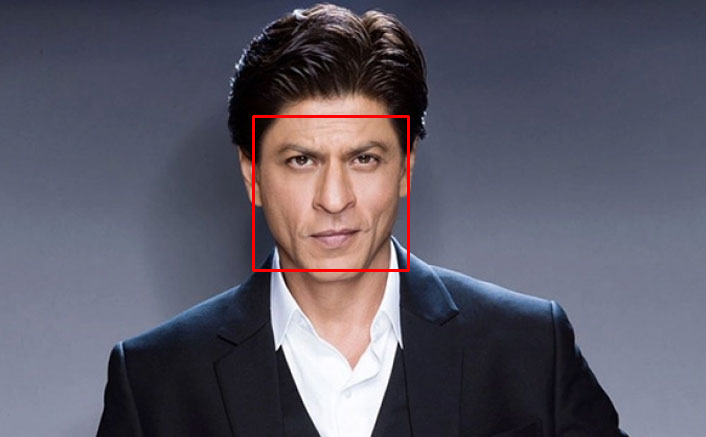

In [5]:
# display the extracted faces
image = cv2.imread('shahrukh.jpg')
top, right, bottom, left =  face_locations[0]
cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
cv2_imshow(image)

**Face Recogntion**

**Create Face Embeddings**

In [47]:
# load images
shahrukh_image = face_recognition.load_image_file("shahrukh.jpg")
rajnikanth_image = face_recognition.load_image_file("rajnikanth.jpeg")

In [48]:
# extract face encodings
shahrukh_face_encoding = face_recognition.face_encodings(shahrukh_image)[0]
rajnikanth_face_encoding = face_recognition.face_encodings(rajnikanth_image)[0]

In [49]:
known_face_names = ['Shahrukh Khan', 'Rajnikanth']
known_face_encodings = [shahrukh_face_encoding, rajnikanth_face_encoding]

**Test Predictions - Extract Face Locations and Encodings**

In [50]:
image = cv2.imread('test.jpg')
face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

**Test Predictions - Find Face Matches**

In [51]:
face_names = []

In [52]:
# Recognize faces in the images
for face_encoding in face_encodings:
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    
    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    face_names.append(name)

In [53]:
face_names

['Shahrukh Khan', 'Unknown', 'Rajnikanth']

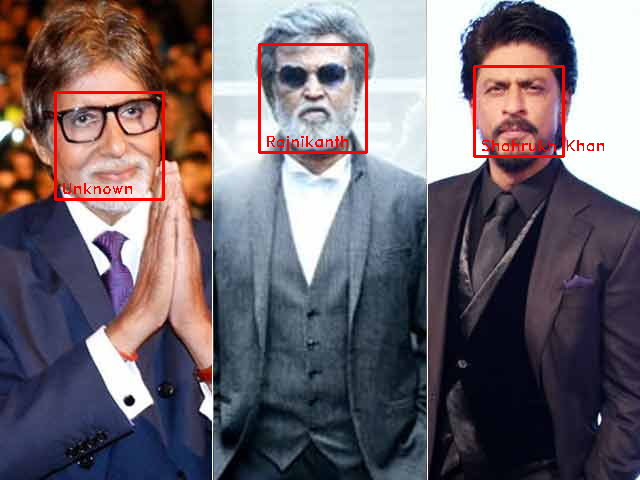

In [54]:
for (top, right, bottom, left), name in zip(face_locations, face_names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 0.5, (0, 0, 255), 1)

cv2_imshow(image)